First 5 rows of the dataset;
     Size  Location  Number of Rooms   Price
0  1536.0     rural              6.0  459069
1  1990.0  suburban              3.0  144995
2   730.0     urban              6.0  393243
3   635.0  suburban              2.0  213217
4  2414.0     rural              4.0  453589

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Size             29 non-null     float64
 1   Location         30 non-null     object 
 2   Number of Rooms  27 non-null     float64
 3   Price            30 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB
None

Missing Values:
Size               1
Location           0
Number of Rooms    3
Price              0
dtype: int64
Dataset after encoding:
     Size  Number of Rooms     Price  Location_suburban  Location_urban
0  1536.0              6

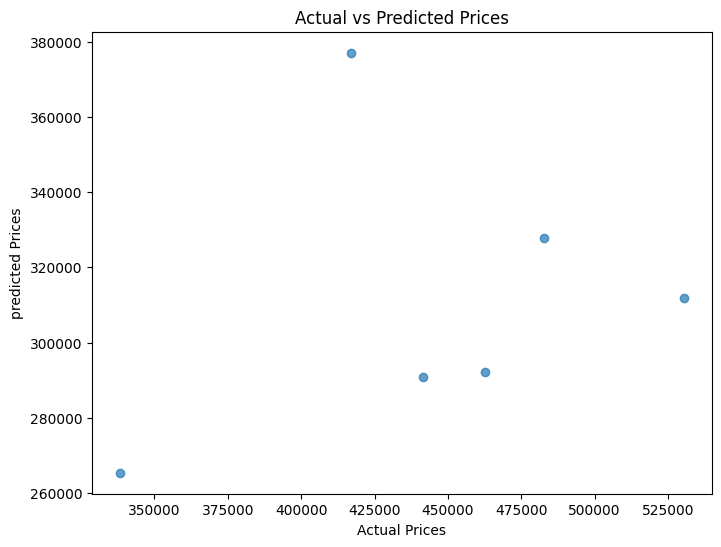

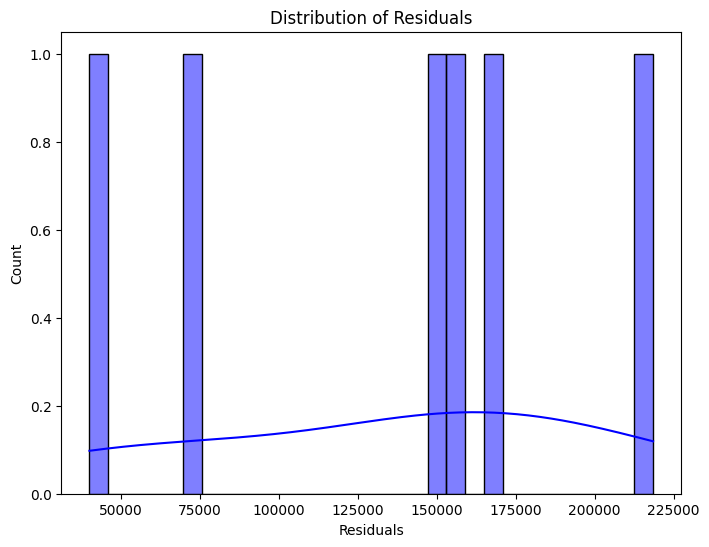

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#load the dataset
data = pd.read_csv('house_prices.csv')
print("First 5 rows of the dataset;")
print(data.head())

#dataset info
print("\nDataset Information:")
print(data.info())

#check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

#fill missing values
data.fillna({'Size': data['Size'].median(), 'Number of Rooms': data['Number of Rooms'].median()}, inplace=True)


#handle outliers
upper_limit = data['Price'].quantile(0.95)
data['Price'] = np.where(data['Price'] > upper_limit, upper_limit, data['Price'])

#encoding the 'location' column using one-hot encoding
data= pd.get_dummies(data, columns=['Location'], drop_first=True)
print("Dataset after encoding:")
print(data.head())

from sklearn.preprocessing import MinMaxScaler

#normalize numerical columns
scaler= MinMaxScaler()
data[['Size', 'Number of Rooms']] = scaler.fit_transform(data[['Size', 'Number of Rooms']])

#define features and target variable
X= data.drop('Price', axis=1)
Y= data['Price']

#split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

#initialize and train the model
model= LinearRegression()
model.fit(X_train, Y_train)

#display coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

#make predictions on the test set
Y_pred= model.predict(X_test)

#evaluate the model
rmse= np.sqrt(mean_squared_error(Y_test,Y_pred))
r2= r2_score(Y_test,Y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

#scatter plot of actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, alpha=0.7)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("predicted Prices")
plt.show()

#Residual plot
residuals= Y_test - Y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()
